# Visualizing the Titanic Disaster

### Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('titanic.csv')

 ### See the first 5 entries

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###  What is the number of observations in the dataset?

In [3]:
print(df.shape[0])

891


###  What is the number of columns in the dataset?

In [4]:
print(df.shape[1])

12


### Print the name of all the columns.

In [5]:
print(*df.columns, sep=' | ')

PassengerId | Survived | Pclass | Name | Sex | Age | SibSp | Parch | Ticket | Fare | Cabin | Embarked


### What is the name of 105th passenger?

In [6]:
print(df.iloc[104]['Name'])

Gustafsson, Mr. Anders Vilhelm


### Set PassengerId as the index 

In [7]:
df = df.set_index('PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Create a pie chart presenting the male/female proportion

([<matplotlib.patches.Wedge at 0x2047ba1d910>,
 [Text(-0.4919454315896098, 0.9838646717603559, 'male'),
  Text(0.49194551760179267, -0.9838646287531149, 'female')])

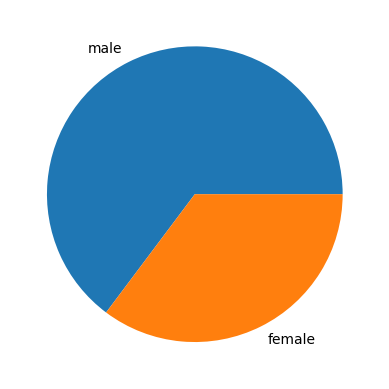

In [8]:
import matplotlib.pyplot as plt

sex_counts = df['Sex'].value_counts()

fig, ax = plt.subplots()
ax.pie(sex_counts, labels=sex_counts.index)

### Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

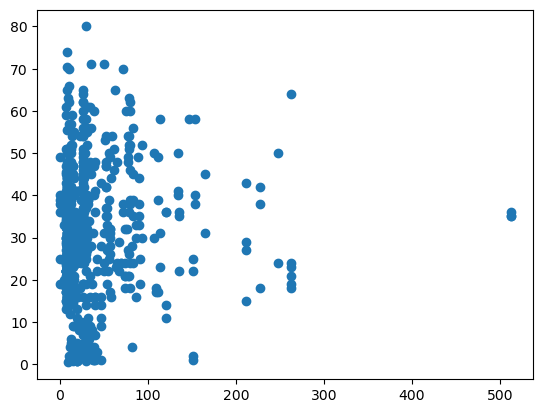

In [9]:
fig, ax = plt.subplots()

plt.scatter(df['Fare'], df['Age'])

### How many people survived?

In [10]:
print(f"{df['Survived'].sum()} people survived.")

342 people survived.


### Create a histogram and box plot with the Fare payed (use subplot)

{'whiskers': [<matplotlib.lines.Line2D at 0x2047ca28d40>,
 'caps': [<matplotlib.lines.Line2D at 0x2047ca292b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2047ca28980>],
 'medians': [<matplotlib.lines.Line2D at 0x2047ca29790>],
 'fliers': [<matplotlib.lines.Line2D at 0x2047ca29a30>],
 'means': []}

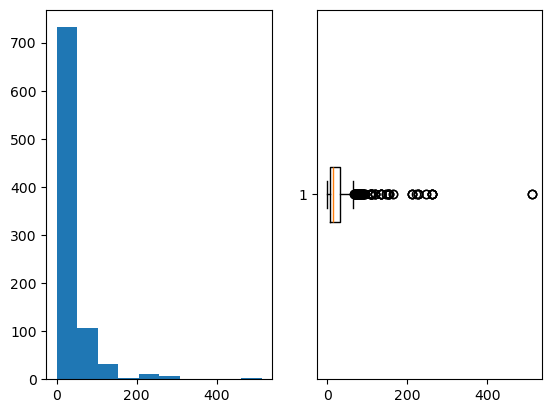

In [15]:
fig, axes = plt.subplots(1, 2)

axes[0].hist(df['Fare'])

axes[1].boxplot(df['Fare'], vert=False)


### Drop passengerID and Ticket columns

In [16]:
df.drop(columns=['Ticket'], inplace=True)
df.reset_index(inplace=True, drop=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


### Is there a meaningful relationship between living and dying with age? (show relationship by visual representation)

### Tell me about the relationship between the age, Pclass and sex